In [2]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('../data/processed/premiums_2.csv')
df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,annual_premium_amount,risk_score,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_salaried,employment_status_self_employed
0,26,0,6,1,9053,6,True,True,False,False,True,False,False,False,False,False,True,False
1,29,2,6,1,16339,6,False,False,True,False,False,True,False,False,False,True,True,False
2,49,2,20,2,18164,6,False,False,False,False,False,False,False,False,False,False,False,True
3,30,3,77,3,20303,0,False,False,True,False,False,False,False,False,False,False,True,False
4,18,0,99,2,13365,6,True,False,False,False,True,False,True,False,False,True,False,True


In [4]:
# machine learning imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor


### Why MinMaxScaler and Why Scale Before Splitting?

In [5]:
# Scale the data before split
scaler = MinMaxScaler()
cols_to_scale = ["age", "number_of_dependants","income_lakhs", "insurance_plan", "risk_score"]
# cols_to_scale = ["age", "number_of_dependants", "income_level", "income_lakhs", "insurance_plan" , "risk_score"]

#df_scaled = df.copy()
#df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
#df_scaled.describe()
X_train, X_test, y_train, y_test = train_test_split(df.drop("annual_premium_amount", axis=1), df["annual_premium_amount"], test_size=0.3, random_state=42)

scaler.fit(X_train[cols_to_scale])

MinMaxScaler()

In [6]:
X_train = X_train.copy()
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test = X_test.copy()
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (34935, 17)
X_test shape:  (14973, 17)
y_train shape:  (34935,)
y_test shape:  (14973,)


In [7]:
# Linear Regression Training
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluation
r2_lr_train = model_lr.score(X_train, y_train)
r2_lr_test = model_lr.score(X_test, y_test)

print("Linear Regression Model R2 Scores:")
print("Train: ", r2_lr_train)
print(" Test: ", r2_lr_test)

Linear Regression Model R2 Scores:
Train:  0.9280957176093705
 Test:  0.9283765993531428


In [8]:
features_importances = model_lr.coef_

coef_df = pd.DataFrame(features_importances, index=X_test.columns, columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
coef_df

,Coefficients
marital_status_unmarried,-821.780886
number_of_dependants,-536.611730
income_lakhs,-353.970671
region_northwest,-34.502191
region_southwest,-23.473726
region_southeast,27.975046
gender_male,121.530230
employment_status_salaried,149.571795
bmi_category_underweight,364.313509
employment_status_self_employed,378.251303


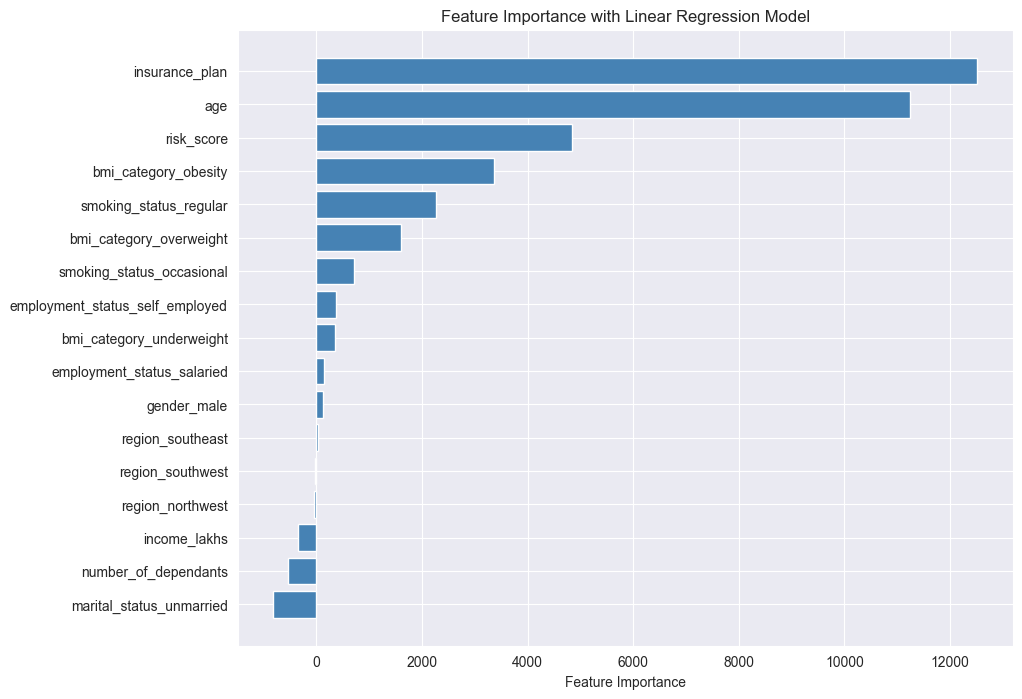

In [9]:
# Feature Importance with horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df["Coefficients"], color="steelblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance with Linear Regression Model")
plt.show()

### Insight: Linear Regression Interpretation
- The most important feature is `insurance_plan` with a positive coefficient.
- The second most important feature is `risk_score` with a positive coefficient.
- The least important feature is `region` with values close to zero.

In [10]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-2, 2, 50)

model_rcv = RidgeCV(alphas=alphas, cv=5)
model_rcv.fit(X_train, y_train)

# Scores between train and test
print("RidgeCV best alpha: ", model_rcv.alpha_)

# Find the best alpha with
r2_rcv_train = model_rcv.score(X_train, y_train)
r2_rcv_test = model_rcv.score(X_test, y_test)

print("RidgeCV Model R2 Scores:")
print("Train: ", r2_rcv_train)
print(" Test: ", r2_rcv_test)



RidgeCV best alpha:  0.6250551925273969
RidgeCV Model R2 Scores:
Train:  0.9280957028667689
 Test:  0.9283765400876584


In [11]:
features_importances_rcv = model_rcv.coef_
coef_df_rcv = pd.DataFrame(features_importances_rcv, index=X_test.columns, columns=["Coefficients"])
coef_df_rcv = coef_df_rcv.sort_values(by="Coefficients", ascending=True)

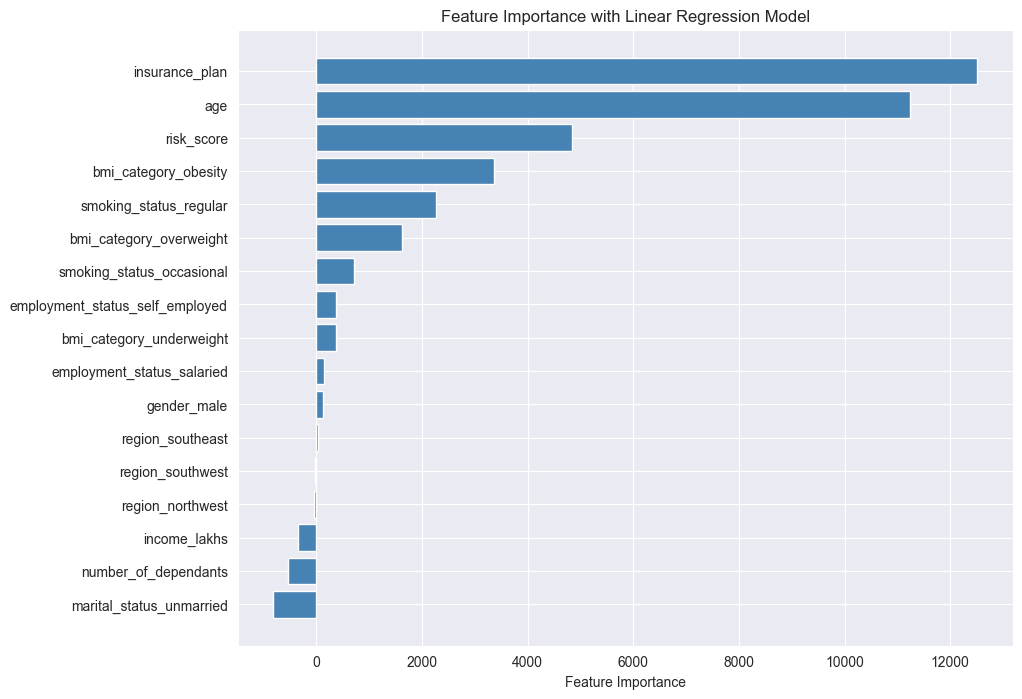

In [12]:
# Feature Importance with horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df_rcv["Coefficients"], color="steelblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance with Linear Regression Model")
plt.show()

In [13]:
from sklearn.linear_model import LassoCV

# decrease eps for finer search
# increase n_alphas for more alphas and more thorough search
model_lcv = LassoCV(eps=0.0001, n_alphas=200, cv=5)
model_lcv.fit(X_train, y_train)

# Get the best alpha
print("LassoCV best alpha: ", model_lcv.alpha_)

# Scores between train and test
r2_lcv_train = model_lcv.score(X_train, y_train)
r2_lcv_test = model_lcv.score(X_test, y_test)

print("LassoCV Model R2 Scores:")
print("Train: ", r2_lcv_train)
print(" Test: ", r2_lcv_test)

LassoCV best alpha:  0.3031439346584028
LassoCV Model R2 Scores:
Train:  0.9280954404143388
 Test:  0.9283733431511728


In [14]:
features_importances_lcv = model_lcv.coef_
coef_df_lcv = pd.DataFrame(features_importances_lcv, index=X_test.columns, columns=["Coefficients"])
coef_df_lcv = coef_df_lcv.sort_values(by="Coefficients", ascending=True)

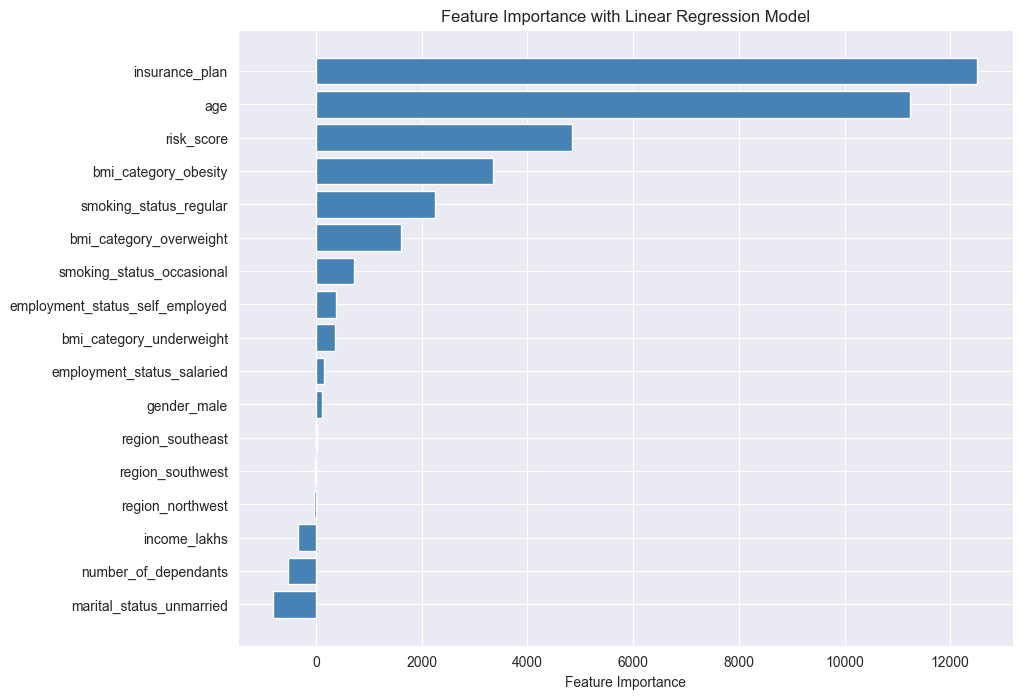

In [15]:
# Feature Importance with horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df_lcv["Coefficients"], color="steelblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance with Linear Regression Model")
plt.show()

### Insight: RidgeCV, Lasso, and Linear Regression Comparison
- The feature importances are similar in RidgeCV and Linear Regression models which makes sense since we moved multicollinearity between features with VIF analysis in Feature Engineering and Selection.
-

In [16]:
# Lets try xgboost

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
print("XGBoost Model R2 Scores:")
print("Train: ", train_score)
print(" Test: ", test_score)

XGBoost Model R2 Scores:
Train:  0.9861041903495789
 Test:  0.9807721972465515


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [18]:
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost RMSE: ", rmse_xgb)
print("XGBoost MSE: ", mse_xgb)

XGBoost RMSE:  1165.1131919260033
XGBoost MSE:  1357488.75


In [19]:
# Create random search cv
from sklearn.model_selection import RandomizedSearchCV


In [20]:
model_xgb_2 = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

random_search = RandomizedSearchCV(
    model_xgb_2,
    param_distributions=param_grid,
    n_iter=9,
    cv=3,
    verbose=0,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9810737768809)

In [22]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [31]:
best_model_xgb = random_search.best_estimator_

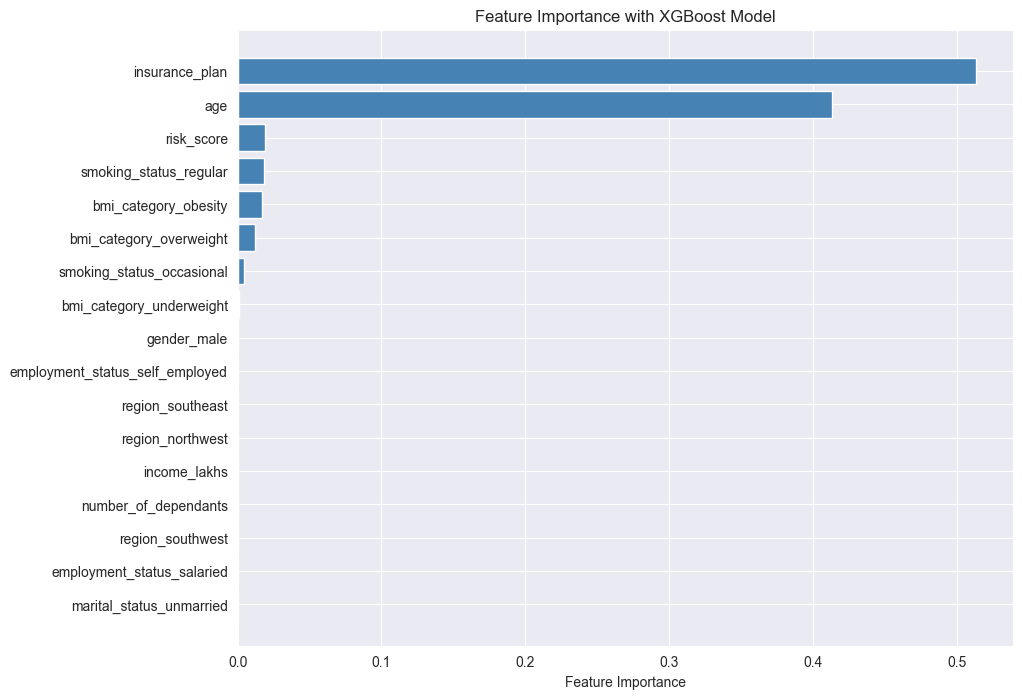

In [34]:
features_importances = best_model_xgb.feature_importances_
coef_df = pd.DataFrame(features_importances, index=X_test.columns, columns=["Coefficients"])
coef_df = coef_df_rcv.sort_values(by="Coefficients", ascending=True)

# Feature Importance with horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df["Coefficients"], color="steelblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance with XGBoost Model")
plt.show()

## 🔍 Feature Importance Analysis from XGBoost Model

The chart above displays the feature importances derived from the **XGBoost regression model** using the `feature_importances_` attribute, which is based on the **gain** (i.e., improvement in split quality) of each feature across all trees in the ensemble.

### 🧠 Key Observations:
- **`insurance_plan`** and **`age`** dominate the model, accounting for the overwhelming majority of importance. These features likely have the strongest influence on predicting the target variable.
- Other features like `risk_score`, `smoking_status_regular`, and `bmi_category_obesity` contribute marginally, but their impact is relatively small.
- Many features (e.g., `region`, `employment_status`, `marital_status`) have **very low or even zero** importance in this model — possibly because:
  - They don’t provide much gain after the top variables are used.
  - They may be highly collinear or redundant in decision paths.

### ⚠️ Interpretation Caution:
While this plot is useful, interpreting feature importance in XGBoost isn't as direct as in **linear models**:
- These values don’t represent a *directional* effect (e.g., positive or negative influence).
- Importance scores are **not normalized weights** or coefficients — they reflect **how often and effectively** a feature was used in tree splits.
- A high importance does not imply **causation**, just utility in splitting.

# Error Analysis

In [35]:
y_pred = best_model_xgb.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals/(y_test)*100

results_df = pd.DataFrame({
    'actual': y_test,
    "predicted": y_pred,
    "diff": residuals,
    "diff_pct": residuals_pct
})

results_df.head()

,actual,predicted,diff,diff_pct
24046,9246,9547.453125,301.453125,3.260363
199,11664,13488.259766,1824.259766,15.640087
25415,10472,7417.219727,-3054.780273,-29.170935
32436,26267,25508.873047,-758.126953,-2.886233
30769,9106,9547.453125,441.453125,4.847937


<Axes: xlabel='diff_pct', ylabel='Count'>

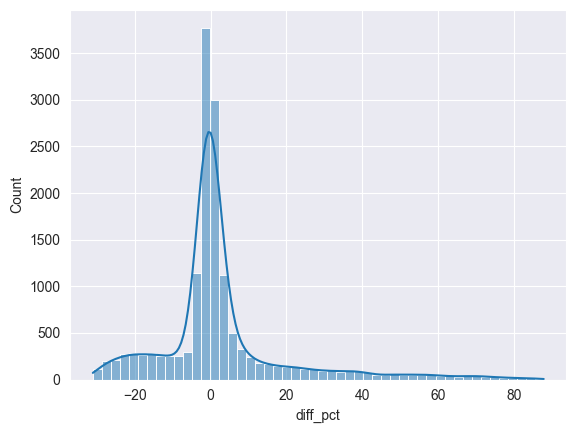

In [36]:
sns.histplot(results_df["diff_pct"], bins=50, kde=True)

### Distribution Problems
* There are too many records where the predictions are much higher than 10%
* The business has a threshold of 10%

In [37]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]
extreme_results_df.shape

(4466, 4)

In [39]:
extreme_errors_pct = extreme_results_df.shape[0] / results_df.shape[0] * 100
print(f"Extreme errors percentage: {extreme_errors_pct:.2f}%")

Extreme errors percentage: 29.83%


In [40]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,risk_score,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_salaried,employment_status_self_employed
199,0.129630,0.2,0.636364,1.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False
25415,0.074074,0.0,0.010101,0.0,0.0,True,True,False,False,True,False,True,False,False,True,True,False
47848,0.111111,0.0,0.424242,1.0,0.0,False,True,False,False,True,False,False,True,False,False,True,False
26182,0.037037,0.0,0.292929,0.0,0.0,True,True,False,False,True,False,False,True,False,False,False,False
16869,0.111111,0.0,0.606061,0.5,0.0,True,False,False,False,True,False,False,True,False,True,False,False


### Distribution Problems
* We can compare the distribution from the original dataset and from the dataset that has high errors
* By doing this we get to see which groups are causing problems for the model

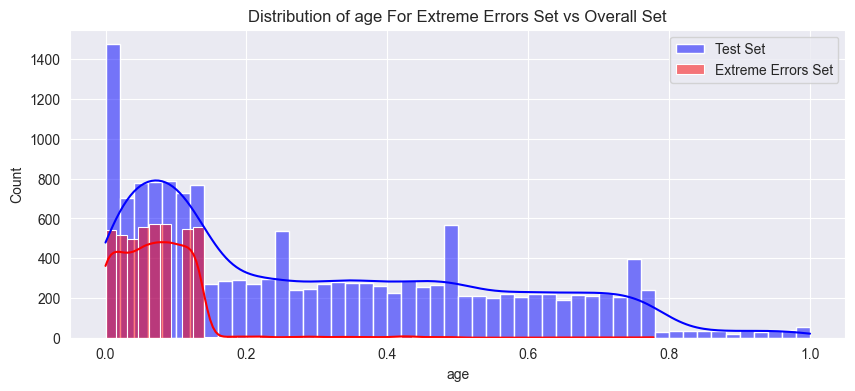

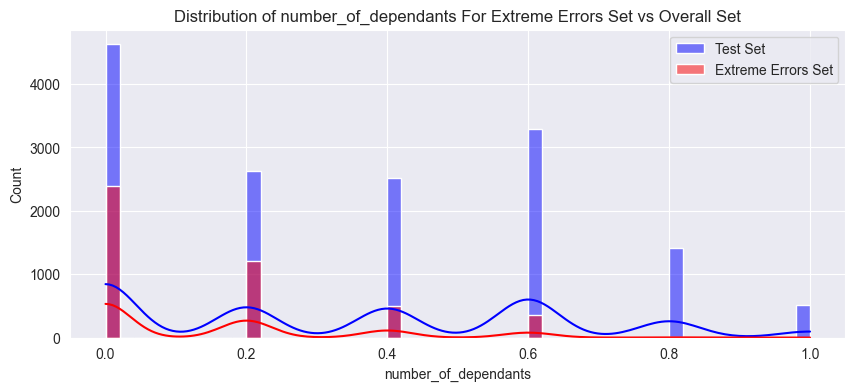

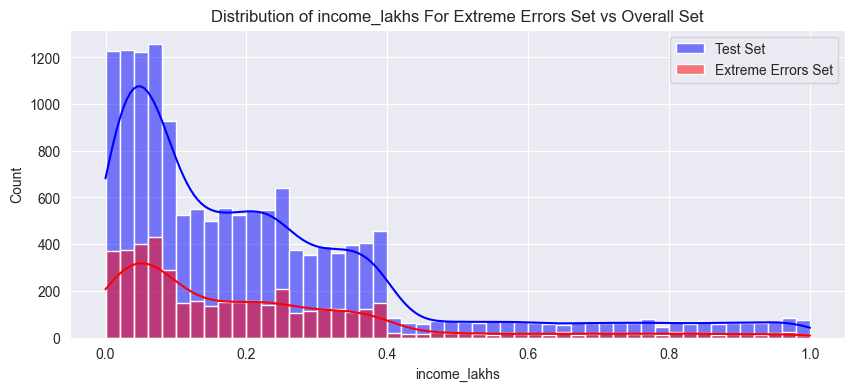

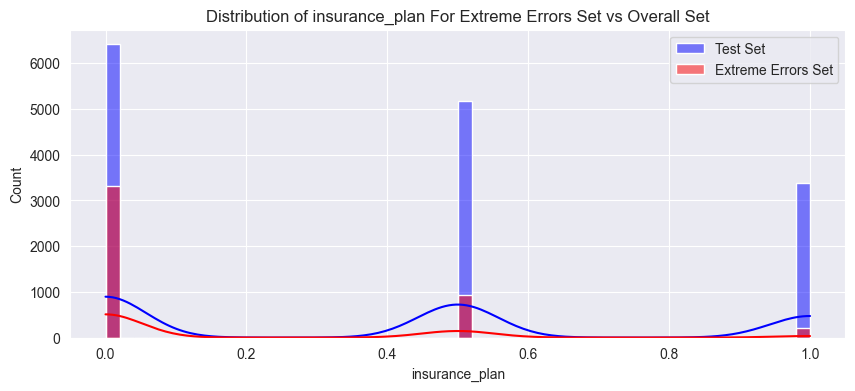

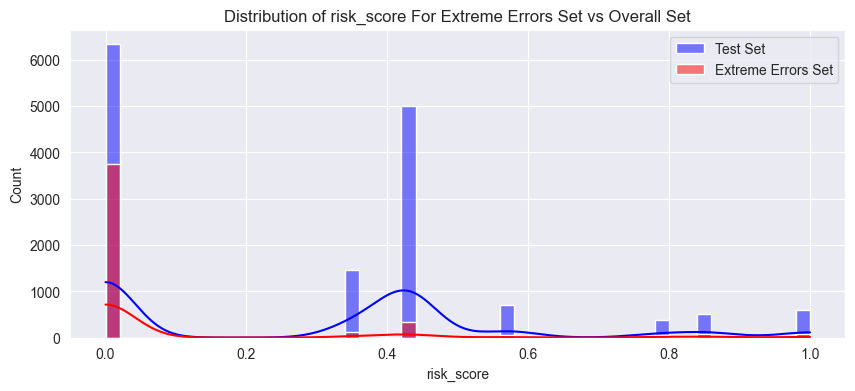

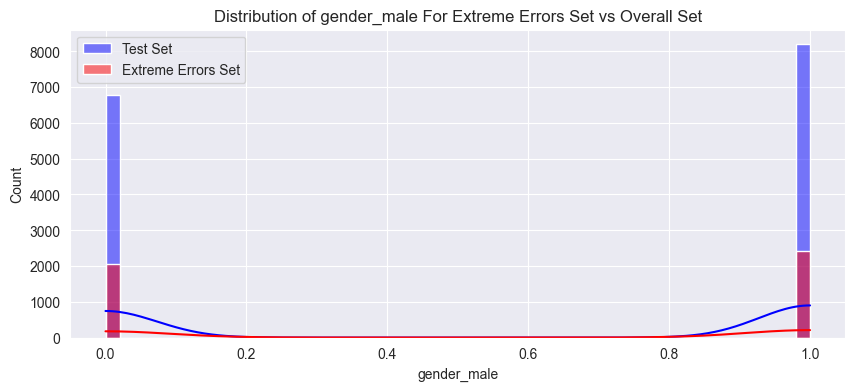

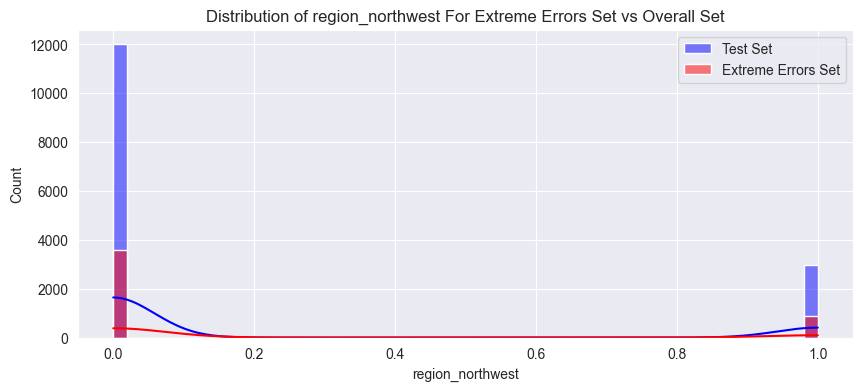

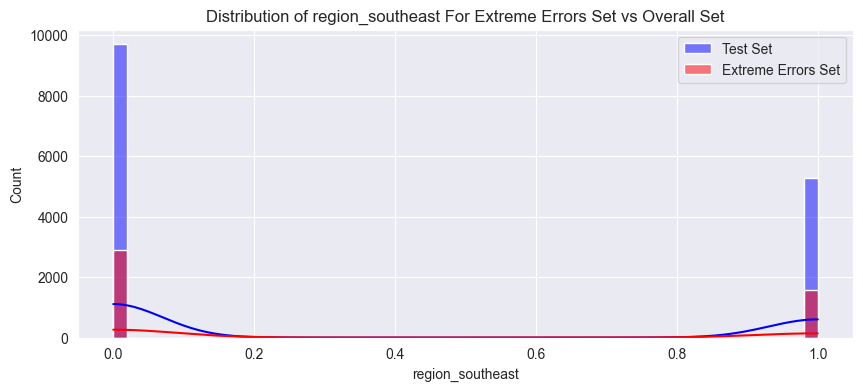

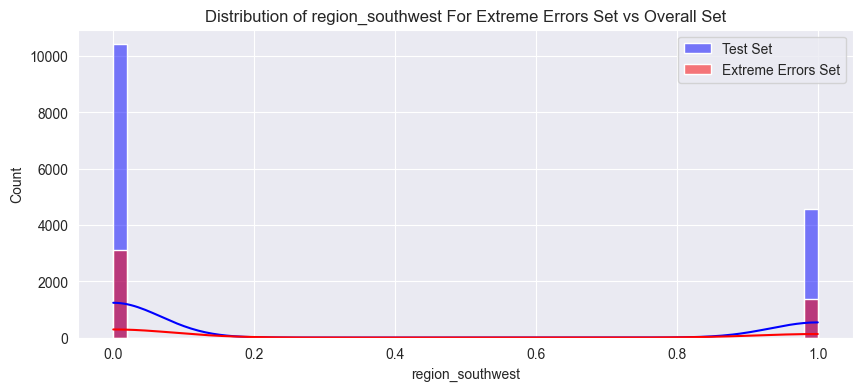

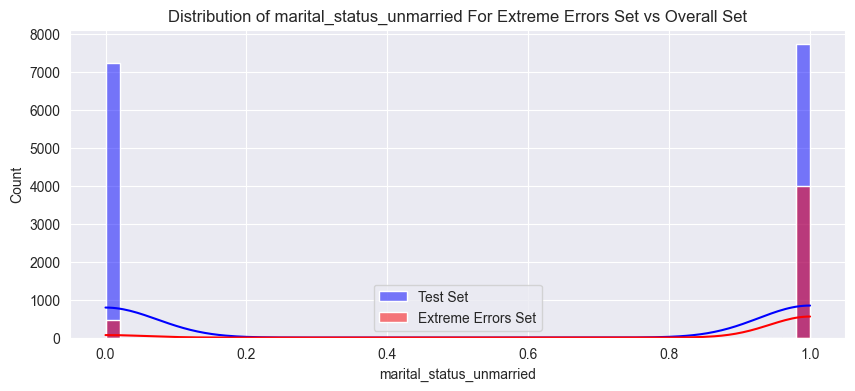

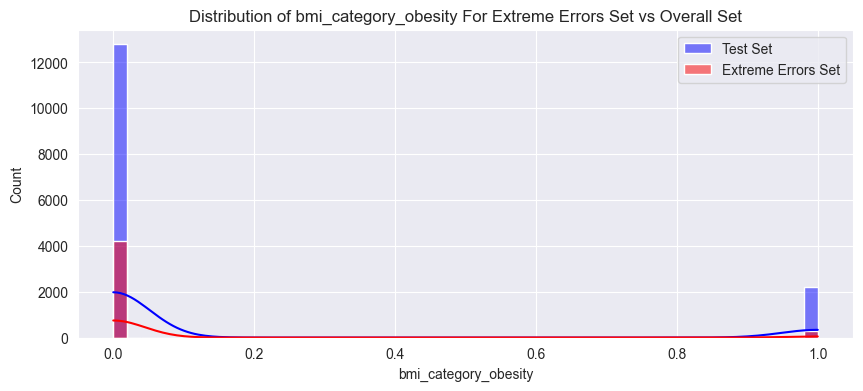

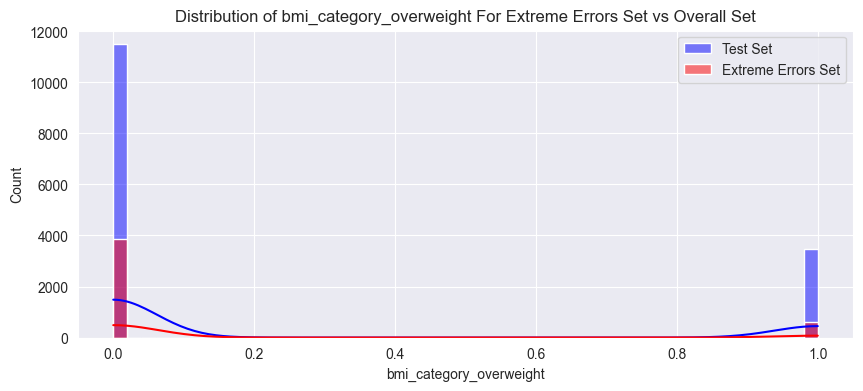

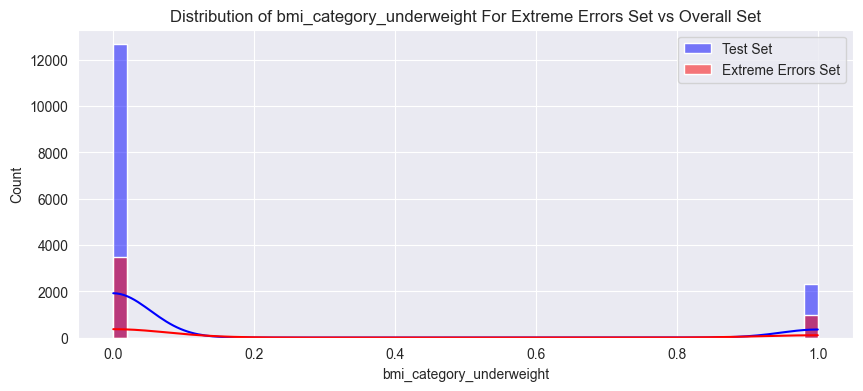

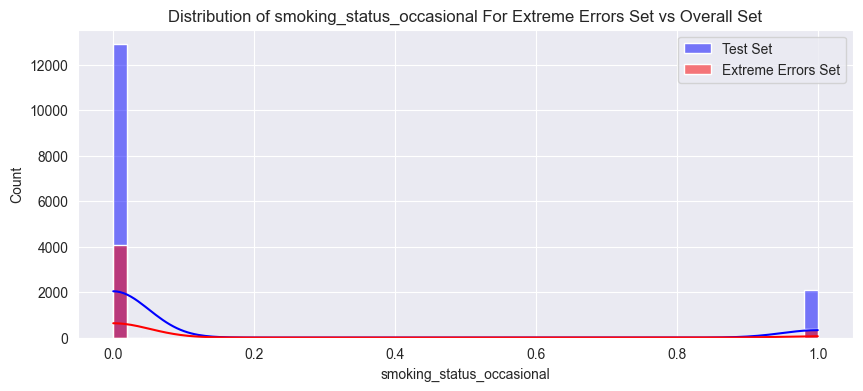

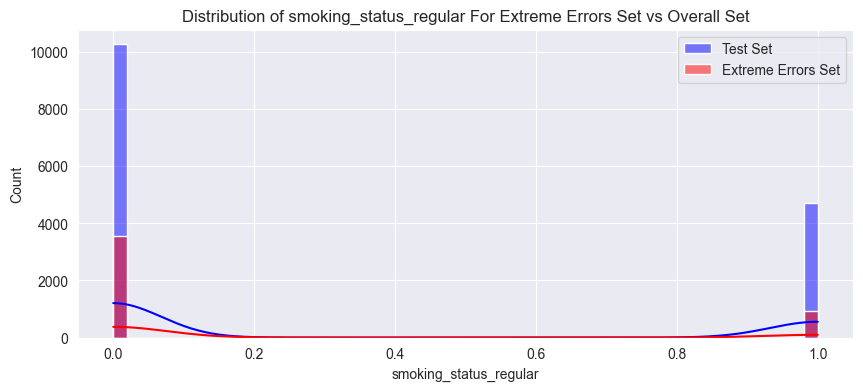

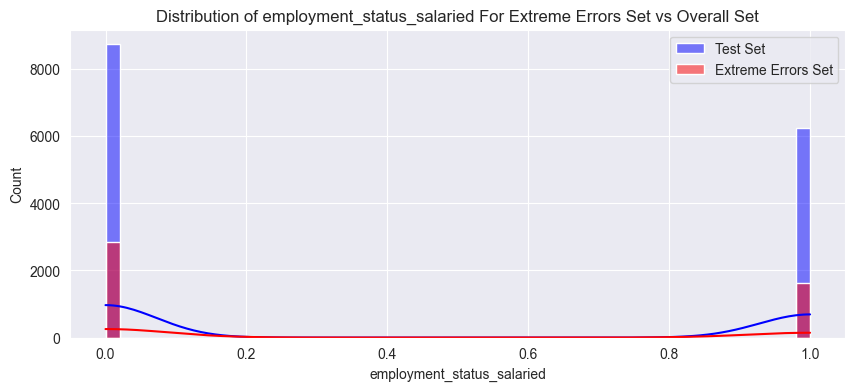

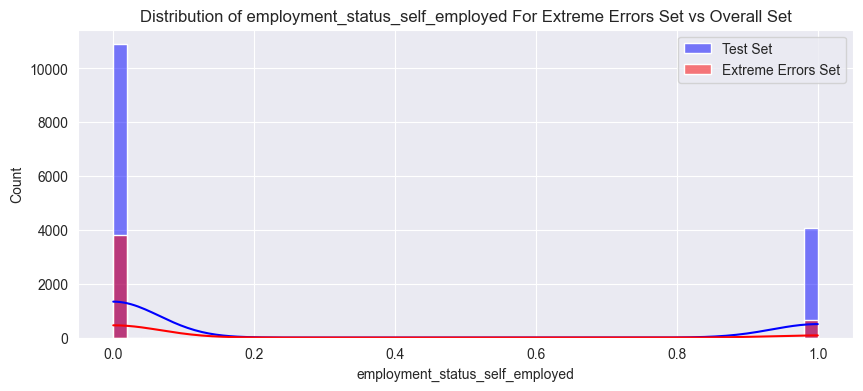

In [42]:
# Plot the distribution of each feature side by side
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(X_test[feature], bins=50, kde=True, color='blue', label='Test Set')
    sns.histplot(extreme_errors_df[feature], bins=50, kde=True, color='red', label='Extreme Errors Set')
    plt.title(f"Distribution of {feature} For Extreme Errors Set vs Overall Set")
    plt.legend()

In [45]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])

<Axes: xlabel='age', ylabel='Count'>

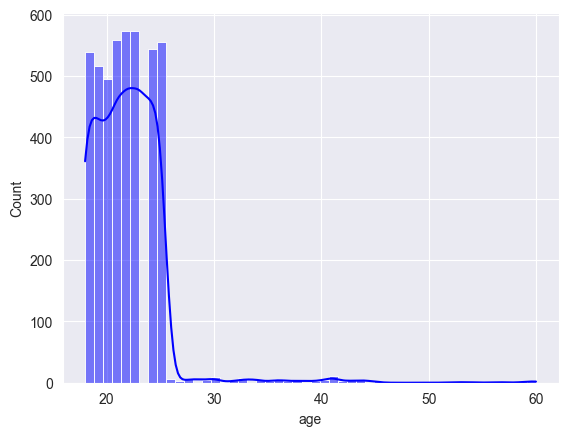

In [46]:
sns.histplot(df_reversed["age"], bins=50, kde=True, color='blue', label='Extreme Test Set')

In [50]:
print("97% of customers in the extreme errors set are at or below age:", df_reversed.age.quantile(0.97))

97% of customers in the extreme errors set are at or below age: 25.0


📊 Distribution Comparison: Extreme Errors vs Overall Test Set

The distribution plots above compare the overall test set against the extreme errors subset, helping us understand which types of users are contributing most to model mispredictions.

🤔 Key Takeaways:

Across most variables, the shapes of the distributions remain consistent between the full test set and the extreme errors set. This implies that errors are not highly concentrated in most demographic or categorical groups.

Differences in counts are expected due to the smaller sample size of the extreme error subset.

🚫 But Age Stands Out

A clear deviation is observed in the age distribution:

The extreme errors are heavily concentrated among younger individuals.

This skew is not present in the general test distribution, which is more uniformly spread across ages.

This implies that younger users are disproportionately affected by model mispredictions, possibly due to less representativeness or unique feature interactions not well captured.

📊 Suggested Next Steps:

Consider building a separate model segment or applying post-calibration techniques specifically for younger individuals.